In [18]:
import arma
import importlib
from logger import Logger
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
logger = Logger(show = True, html_output = True, config_file = "config.txt")

importlib.reload(arma)

2019.06.04-16:27:57 Initialize the logger
2019.06.04-16:27:57 Create logs folder logs
2019.06.04-16:27:57 Create log file logs/2019-06-04_16_27_57_log0.html
2019.06.04-16:27:57 Create models folder models
2019.06.04-16:27:57 Create output folder output
2019.06.04-16:27:57 Create data folder data
2019.06.04-16:27:57 Read config file config.txt


<module 'arma' from '/Users/mihaivo/PycharmProjects/CyberAnomDetect2/arma.py'>

In [2]:
def parser(x):
	return pd.datetime.strptime(x, '%d/%m/%y %H')

series = pd.read_csv(logger.get_data_file(logger.config_dict['TRAIN_FILE']), header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser).asfreq('h')

In [3]:
series.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-06 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-01-06 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-01-06 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-01-06 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-01-06 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [4]:
grid_search_result = arma.grid_search(series, series.columns[:-1], range(0, 6), range(0, 2), range(0, 2))

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: divide by zero encountered in log
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)
/usr/local/

In [5]:
top = [i[0] for i in grid_search_result]
top

[[<statsmodels.tsa.arima_model.ARMAResultsWrapper at 0x10bccf780>,
  5,
  1,
  0,
  'L_T1'],
  5,
  1,
  0,
  'L_T2'],
  5,
  1,
  0,
  'L_T3'],
  5,
  1,
  0,
  'L_T4'],
  5,
  1,
  0,
  'L_T5'],
  5,
  1,
  0,
  'L_T6'],
  5,
  1,
  0,
  'L_T7'],
  5,
  1,
  0,
  'F_PU1'],
  0,
  0,
  0,
  'S_PU1'],
  5,
  1,
  0,
  'F_PU2'],
  5,
  1,
  0,
  'S_PU2'],
  0,
  0,
  0,
  'F_PU3'],
  0,
  0,
  0,
  'S_PU3'],
  5,
  1,
  0,
  'F_PU4'],
  5,
  1,
  0,
  'S_PU4'],
  0,
  0,
  0,
  'F_PU5'],
  0,
  0,
  0,
  'S_PU5'],
  4,
  0,
  0,
  'F_PU6'],
  4,
  0,
  0,
  'S_PU6'],
  5,
  1,
  0,
  'F_PU7'],
  5,
  1,
  0,
  'S_PU7'],
  5,
  1,
  0,
  'F_PU8'],
  5,
  1,
  0,
  'S_PU8'],
  0,
  0,
  0,
  'F_PU9'],
  0,
  0,
  0,
  'S_PU9'],
  5,
  1,
  0,
  'F_PU10'],
  5,
  1,
  0,
  'S_PU10'],
  0,
  1,
  0,
  'F_PU11'],
  0,
  1,
  0,
  'S_PU11'],
  5,
  1,
  0,
  'F_V2'],
  4,
  1,
  0,
  'S_V2'],
  5,
  1,
  0,
  'P_J280'],
  5,
  1,
  0,
  'P_J269'],
  5,
  1,
  0,
  'P_J300'],
  5,
  1,
  0,
  

AIC: -13038.323699	BIC: -13010.011438	HQIC: -13028.676810	Durbin_Watson: 1.709070
NormaltestResult(statistic=2714.340972100521, pvalue=0.0)
            AC           Q       Prob(>Q)
lag                                      
1.0   0.125958  139.045254   4.305261e-32
2.0  -0.092130  213.441273   4.485559e-47
3.0  -0.055633  240.572076   7.158040e-52
4.0   0.005936  240.881014   5.993989e-51
5.0   0.047377  260.561878   2.974286e-54
6.0   0.005719  260.848643   1.966905e-53
7.0  -0.033405  270.634787   1.114933e-54
8.0  -0.064502  307.126687   1.251729e-61
9.0  -0.007270  307.590308   6.400290e-61
10.0  0.067232  347.246008   1.530271e-68
11.0  0.052974  371.868371   5.670879e-73
12.0 -0.005881  372.171882   2.917780e-72
13.0 -0.032762  381.591801   1.717663e-73
14.0 -0.035980  392.954304   3.863625e-75
15.0 -0.055515  420.007815   4.289375e-80
16.0 -0.037802  432.553273   5.359287e-82
17.0 -0.002633  432.614163   2.754965e-81
18.0 -0.010633  433.606917   8.764216e-81
19.0 -0.005937  433.

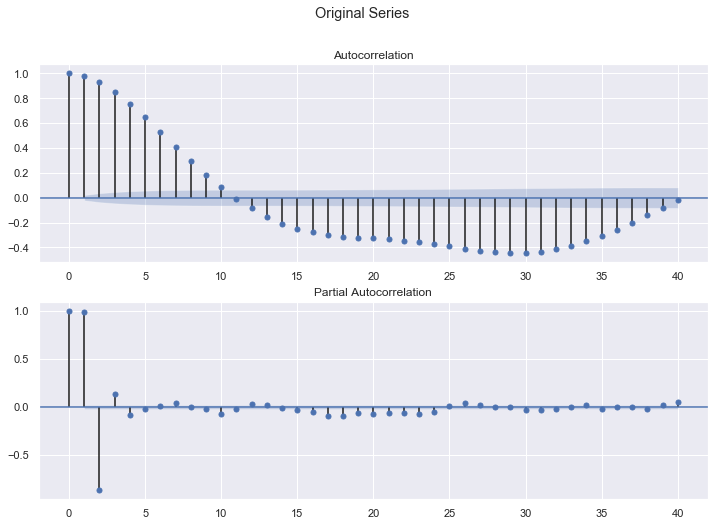

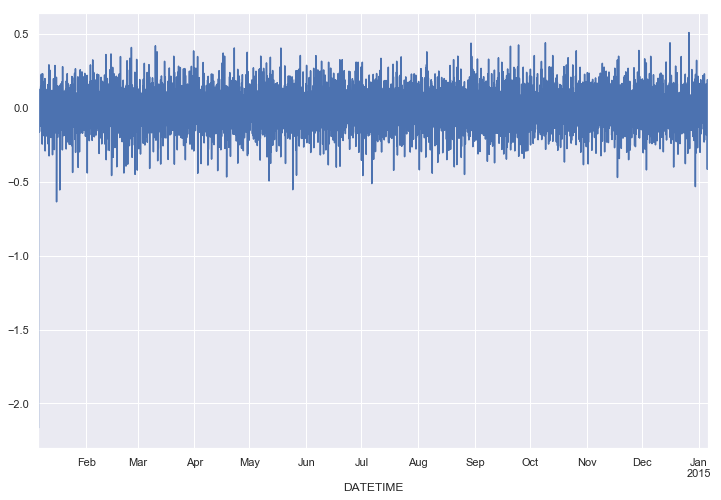

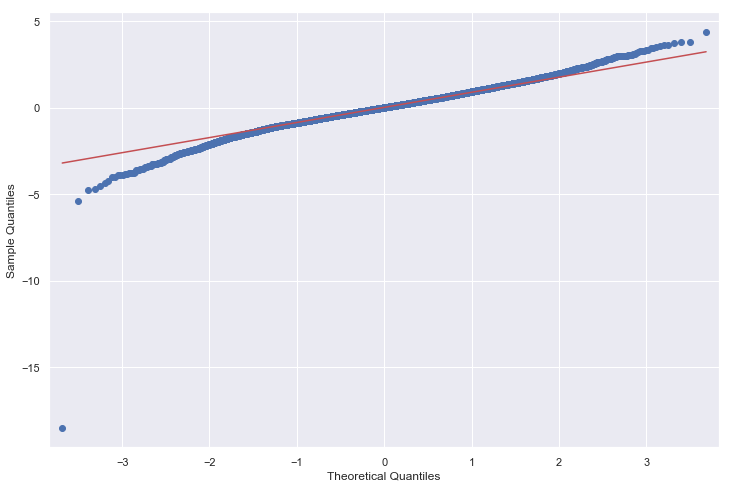

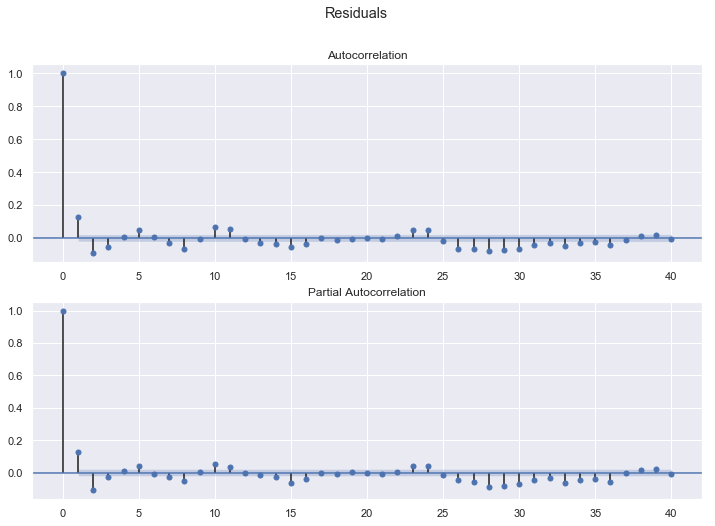

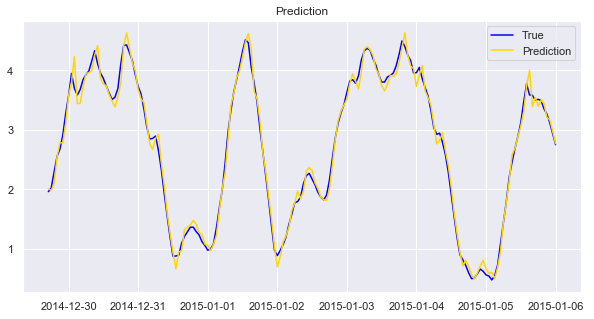

In [20]:
# manual analisys
sns.set()
m = arma.answer(series, 'L_T1', 2, 0, 0, "L_T1.manual.png") 

AIC: -13413.792324	BIC: -13357.167802	HQIC: -13394.498547	Durbin_Watson: 1.953849
NormaltestResult(statistic=2826.6740314313265, pvalue=0.0)
            AC           Q      Prob(>Q)
lag                                     
1.0   0.002688    0.063325  8.013154e-01
2.0   0.002901    0.137103  9.337455e-01
3.0   0.000442    0.138817  9.868032e-01
4.0   0.015781    2.322051  6.767573e-01
5.0   0.043660   19.035838  1.892815e-03
6.0  -0.003407   19.137622  3.937415e-03
7.0  -0.026100   25.111889  7.249087e-04
8.0  -0.061943   58.765526  8.135770e-10
9.0  -0.017895   61.574726  6.658876e-10
10.0  0.042462   77.392330  1.625397e-12
11.0  0.027757   84.152377  2.310296e-13
12.0 -0.016626   86.577988  2.261725e-13
13.0 -0.030799   94.902973  1.601218e-14
14.0 -0.024969  100.374876  4.019178e-15
15.0 -0.043120  116.695847  8.263023e-18
16.0 -0.023327  121.472755  2.860280e-18
17.0  0.014926  123.428751  3.417427e-18
18.0  0.006449  123.793992  8.040268e-18
19.0  0.020548  127.501889  4.323410e-1

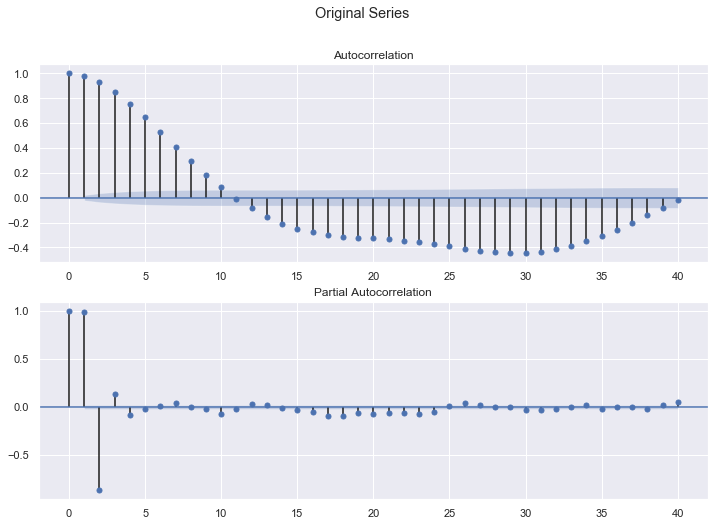

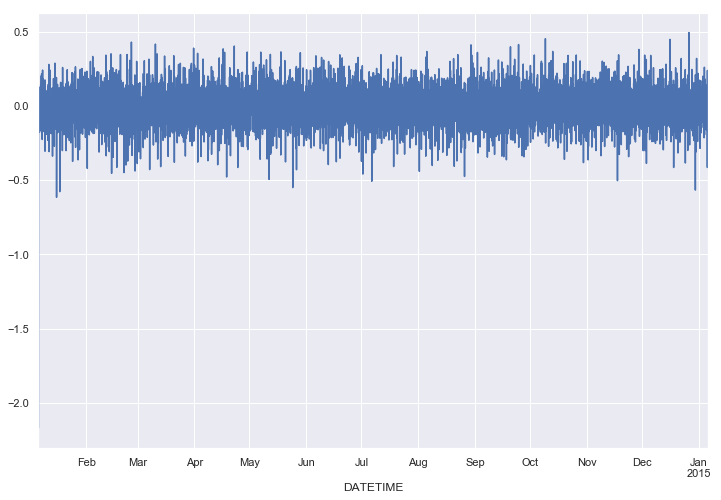

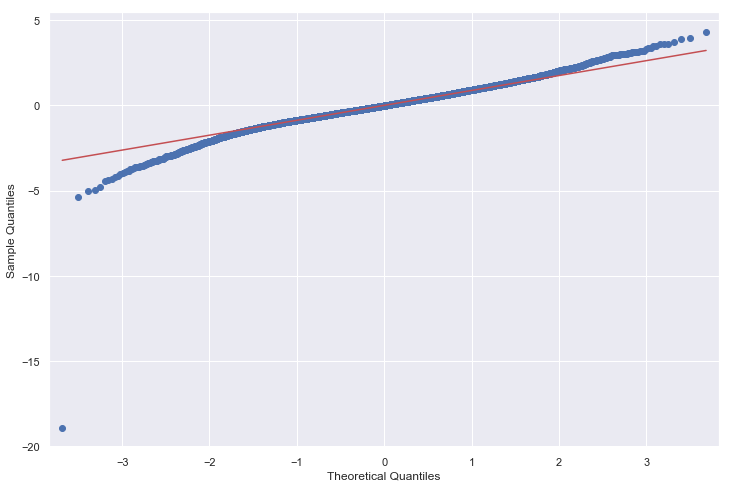

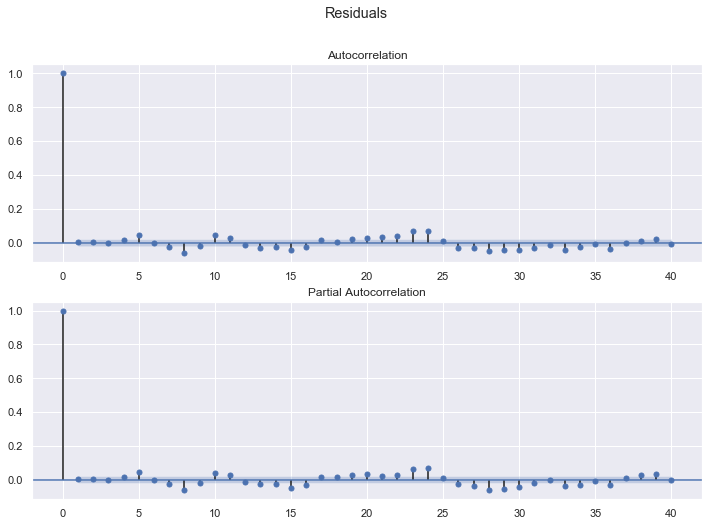

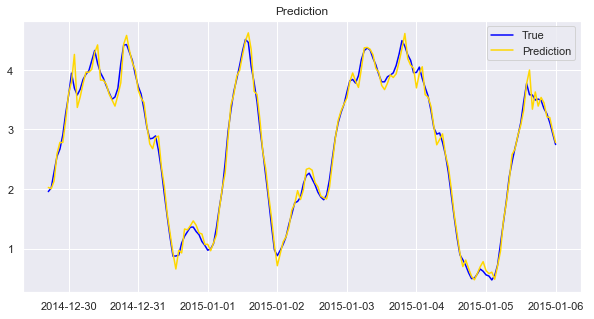

In [21]:
# grid search
sns.set()
arma.answer(series, 'L_T1', 5, 1, 0, "L_T1.grid.png")

AIC: 14280.366964	BIC: 14308.679225	HQIC: 14290.013852	Durbin_Watson: 1.862490
NormaltestResult(statistic=195.47789254684434, pvalue=3.5687404746607065e-43)
            AC           Q      Prob(>Q)
lag                                     
1.0   0.068128   40.677343  1.795571e-10
2.0  -0.082563  100.425234  1.559328e-22
3.0   0.008663  101.083087  9.090764e-22
4.0   0.098106  185.464244  4.998499e-39
5.0   0.063983  221.358968  7.600596e-46
6.0  -0.058835  251.713562  1.764895e-51
7.0  -0.043020  267.944658  4.174816e-54
8.0  -0.021380  271.953751  3.783150e-54
9.0  -0.011782  273.171532  1.261884e-53
10.0  0.009579  273.976463  4.853578e-53
11.0 -0.002054  274.013472  2.568070e-52
12.0 -0.004300  274.175726  1.217096e-51
13.0 -0.030857  282.531593  1.076830e-52
14.0 -0.012247  283.848034  2.734049e-52
15.0  0.000822  283.853960  1.254277e-51
16.0 -0.012655  285.259867  2.853274e-51
17.0 -0.008704  285.925064  8.961115e-51
18.0 -0.001983  285.959601  3.682618e-50
19.0  0.010531  286.933

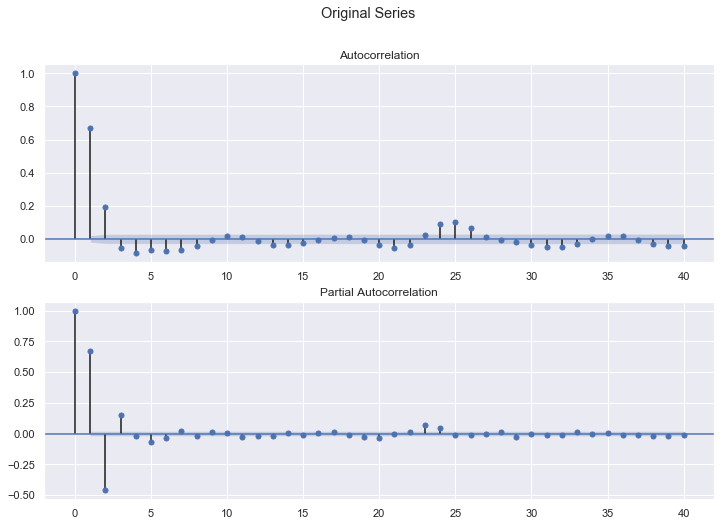

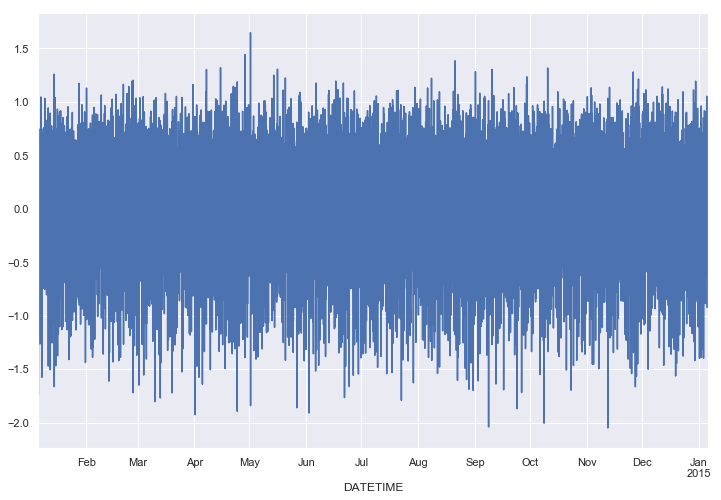

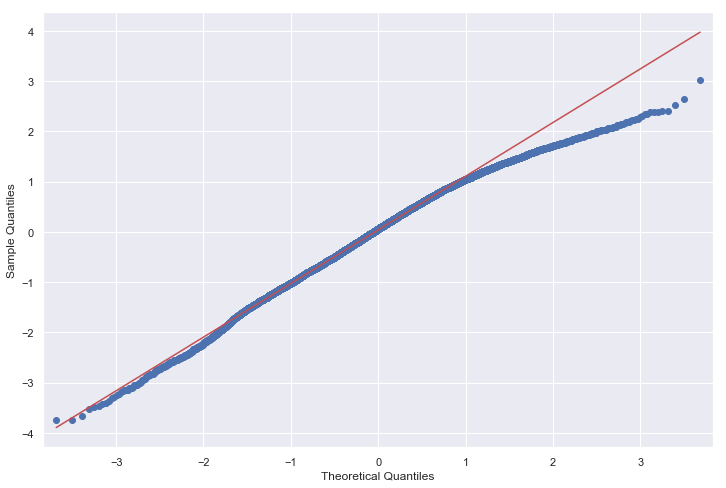

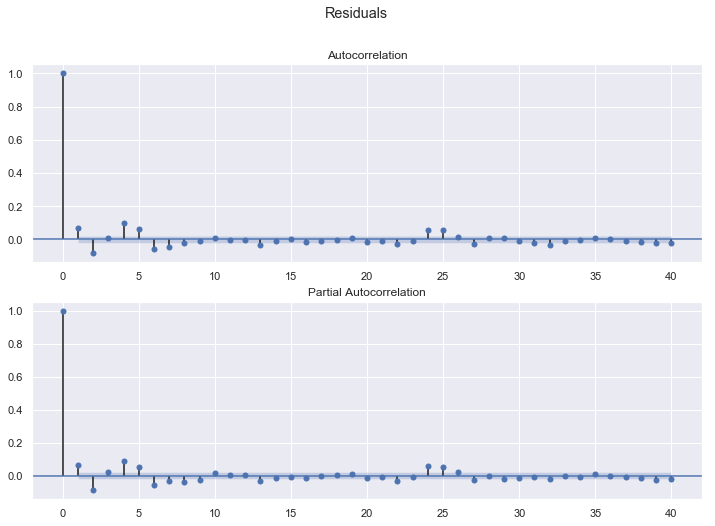

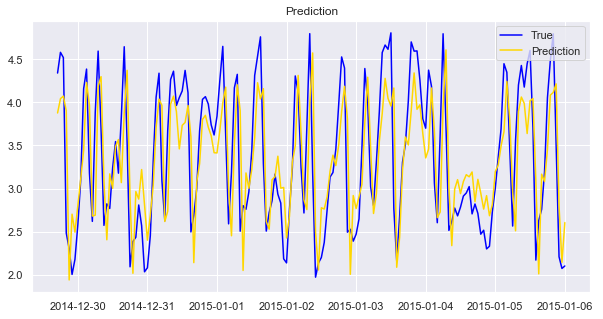

In [22]:
# manual analisys
sns.set()
arma.answer(series, 'L_T7', 2, 0, 0, "L_T7.manual.png") 

AIC: 14044.673009	BIC: 14101.297531	HQIC: 14063.966786	Durbin_Watson: 1.999633
NormaltestResult(statistic=218.352163547798, pvalue=3.849728744390932e-48)
            AC           Q      Prob(>Q)
lag                                     
1.0  -0.000480    0.002023  9.641264e-01
2.0   0.001060    0.011879  9.940781e-01
3.0   0.002002    0.047012  9.973269e-01
4.0  -0.010428    1.000366  9.097405e-01
5.0   0.022186    5.316031  3.785405e-01
6.0  -0.027393   11.896036  6.432871e-02
7.0   0.011746   13.106096  6.956520e-02
8.0   0.003110   13.190937  1.054468e-01
9.0  -0.008435   13.814987  1.290604e-01
10.0  0.013323   15.372203  1.190697e-01
11.0 -0.001823   15.401365  1.648496e-01
12.0 -0.000373   15.402588  2.201548e-01
13.0 -0.033835   25.449622  2.013423e-02
14.0 -0.018670   28.509062  1.216863e-02
15.0 -0.004857   28.716172  1.749256e-02
16.0 -0.010531   29.689741  1.967914e-02
17.0  0.003565   29.801312  2.781408e-02
18.0  0.006669   30.191847  3.562256e-02
19.0  0.012074   31.472140

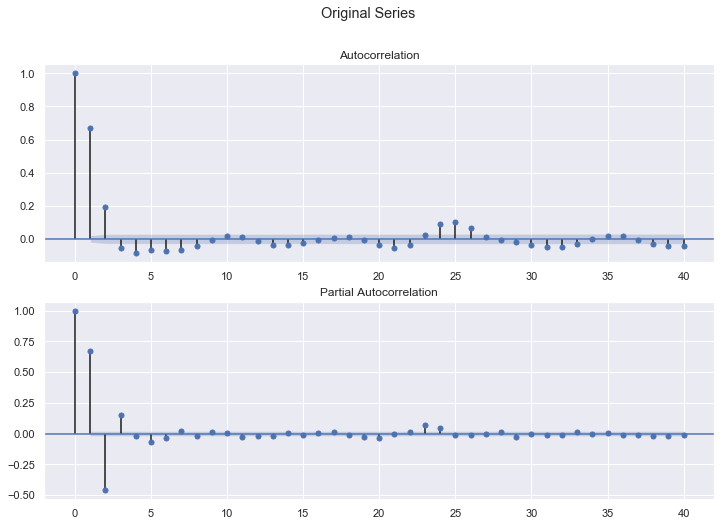

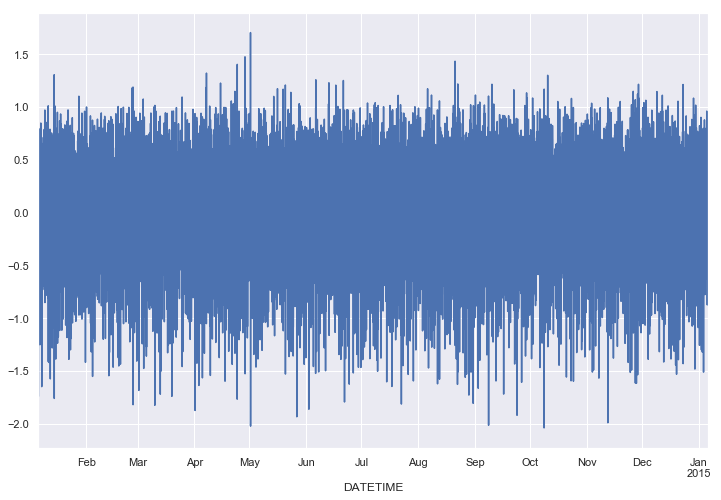

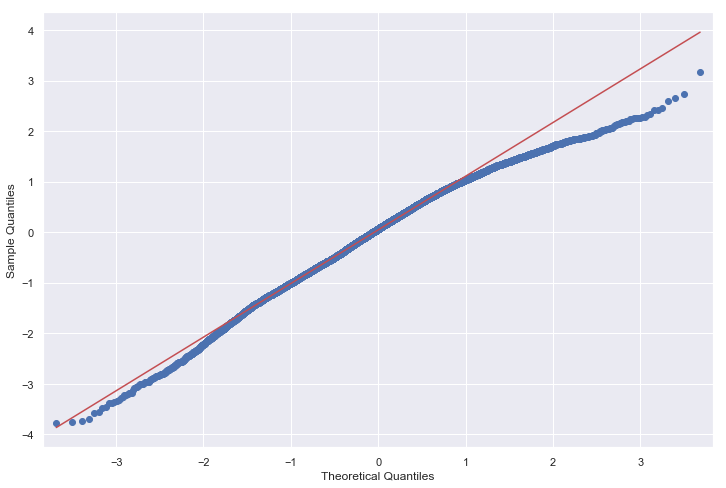

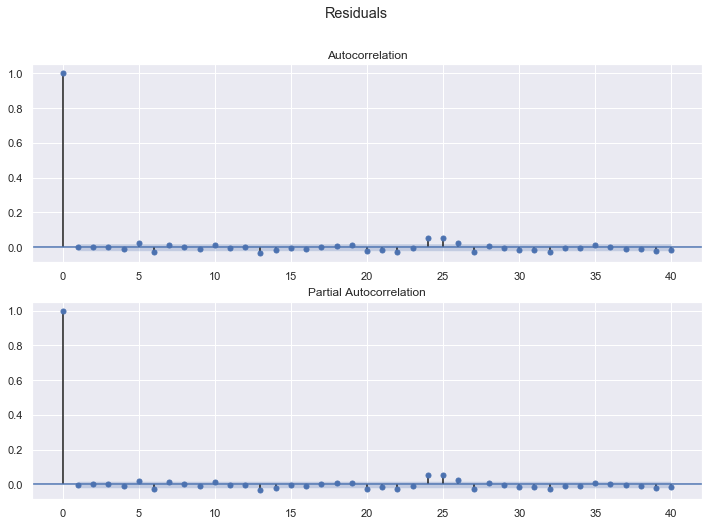

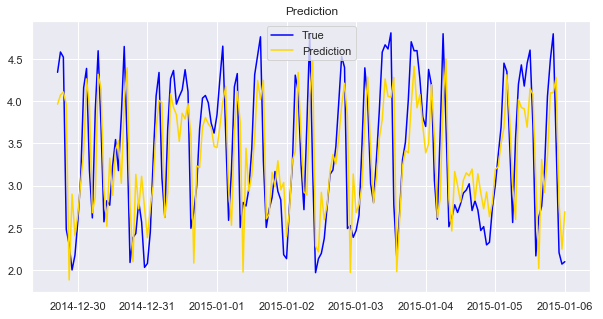

In [23]:
# grid search
sns.set()
arma.answer(series, 'L_T7', 5, 1, 0, "L_T7.grid.png")

AIC: -4550.168276	BIC: -4521.856015	HQIC: -4540.521388	Durbin_Watson: 2.419758
NormaltestResult(statistic=46.58991086244579, pvalue=7.640634058702913e-11)
            AC            Q       Prob(>Q)
lag                                       
1.0  -0.211570   392.291638   2.624150e-87
2.0  -0.243050   910.070627  2.402560e-198
3.0   0.091861   984.041906  5.210779e-213
4.0   0.161659  1213.155774  2.239612e-261
5.0  -0.309083  2050.781851   0.000000e+00
6.0  -0.089239  2120.614126   0.000000e+00
7.0   0.179483  2403.131642   0.000000e+00
8.0  -0.094447  2481.370355   0.000000e+00
9.0  -0.124126  2616.522199   0.000000e+00
10.0 -0.023389  2621.321497   0.000000e+00
11.0  0.184165  2918.906152   0.000000e+00
12.0  0.014134  2920.659075   0.000000e+00
13.0  0.104793  3017.033515   0.000000e+00
14.0  0.010730  3018.044009   0.000000e+00
15.0 -0.072602  3064.313803   0.000000e+00
16.0 -0.100794  3153.503422   0.000000e+00
17.0  0.099242  3239.978242   0.000000e+00
18.0 -0.055011  3266.551415 

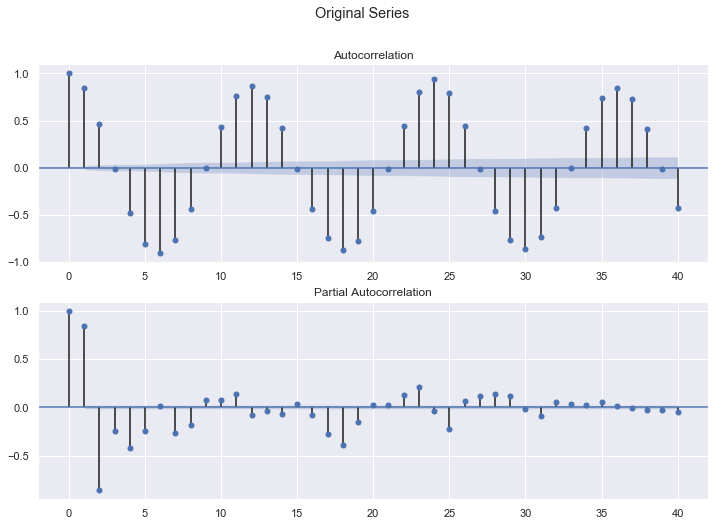

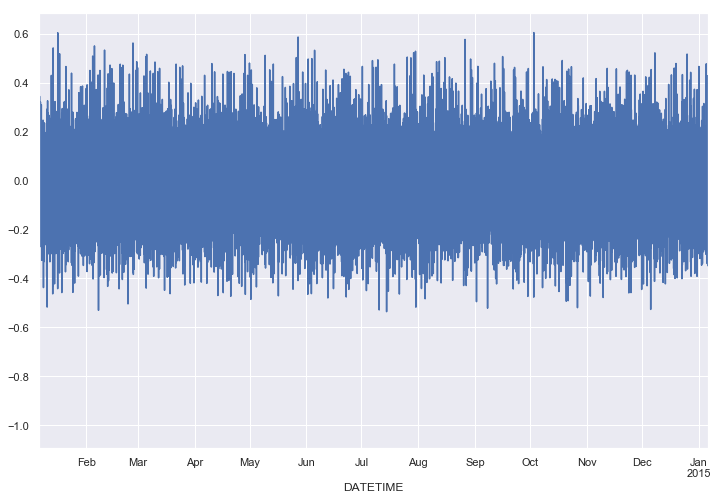

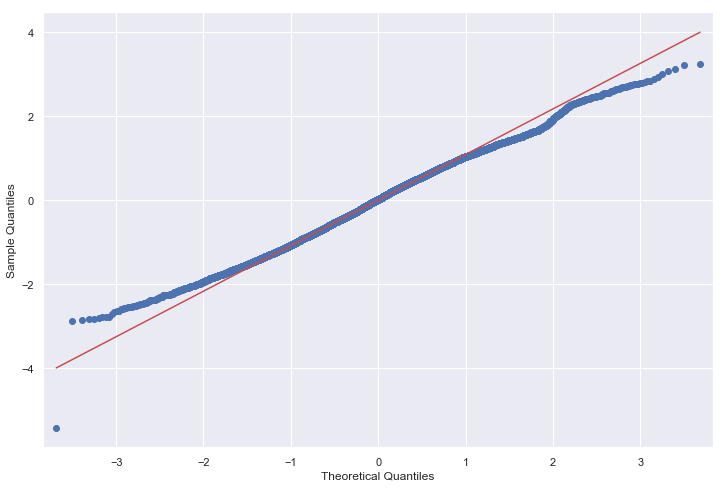

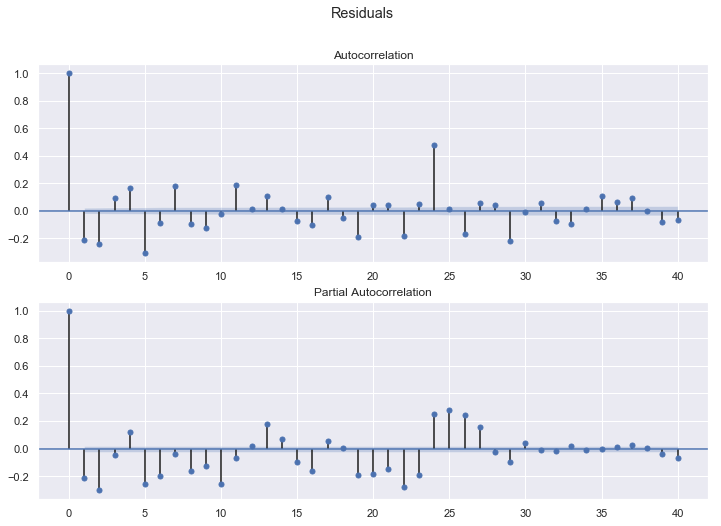

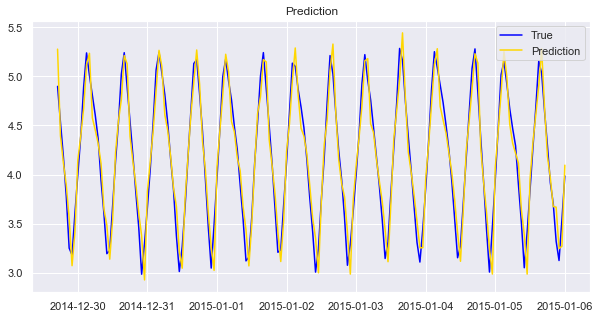

In [24]:
# manual analisys
sns.set()
arma.answer(series, 'L_T3', 2, 0, 0, "L_T3.manual.png") 

AIC: -7620.454763	BIC: -7563.830241	HQIC: -7601.160986	Durbin_Watson: 2.038081
NormaltestResult(statistic=137.17020281161052, pvalue=1.636322562381843e-30)
            AC            Q       Prob(>Q)
lag                                       
1.0  -0.021433     4.025950   4.480537e-02
2.0   0.038187    16.807206   2.240586e-04
3.0  -0.070880    60.847073   3.874852e-13
4.0   0.119765   186.597517   2.853448e-39
5.0  -0.089506   256.840278   1.871624e-53
6.0   0.085837   321.450386   2.062897e-66
7.0   0.212438   717.240092  1.322308e-150
8.0  -0.036837   729.141946  3.798497e-152
9.0  -0.104103   824.207792  1.306551e-171
10.0 -0.170744  1079.971079  1.095974e-225
11.0  0.035363  1090.943324  5.068464e-227
12.0 -0.091027  1163.652428  1.160414e-241
13.0 -0.017261  1166.267071  3.198428e-241
14.0 -0.151641  1368.094255  1.199807e-283
15.0 -0.100842  1457.359617  7.527001e-302
16.0 -0.058702  1487.611133  2.350895e-307
17.0  0.149219  1683.109071   0.000000e+00
18.0  0.074385  1731.696145

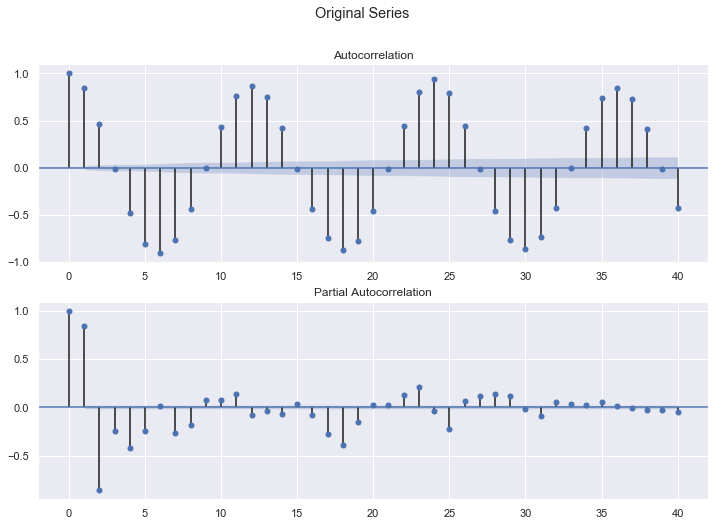

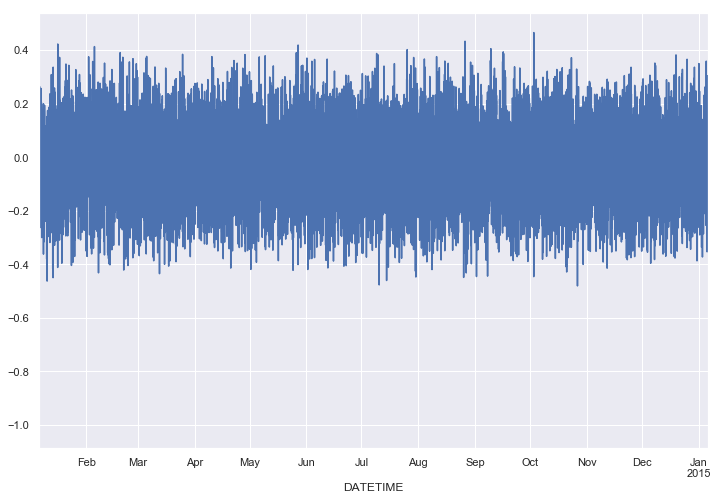

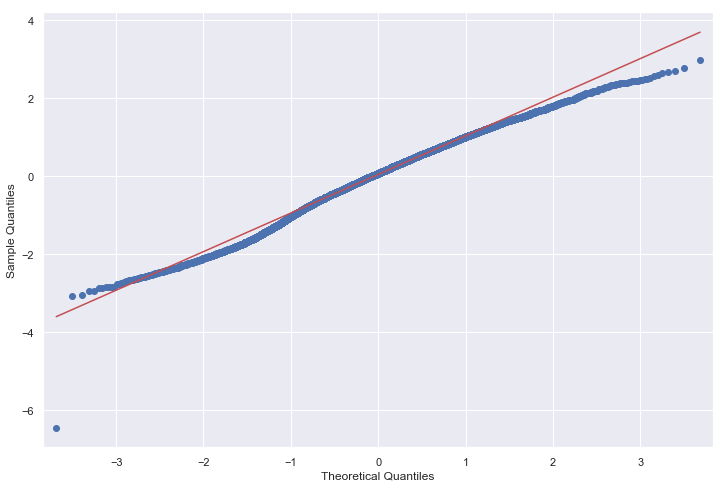

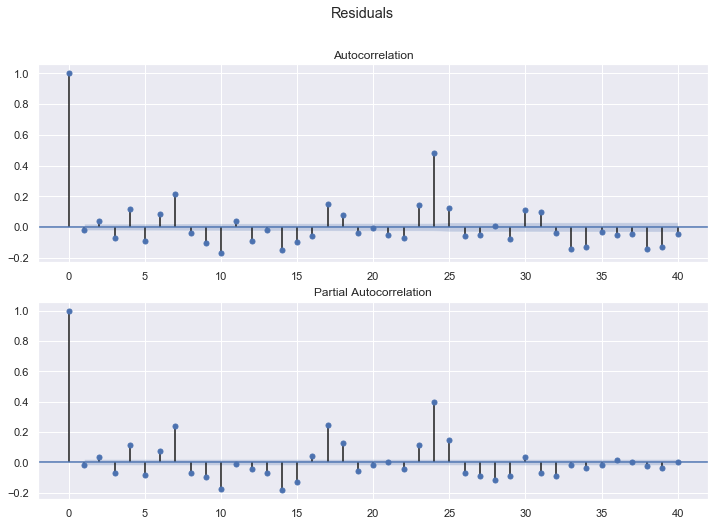

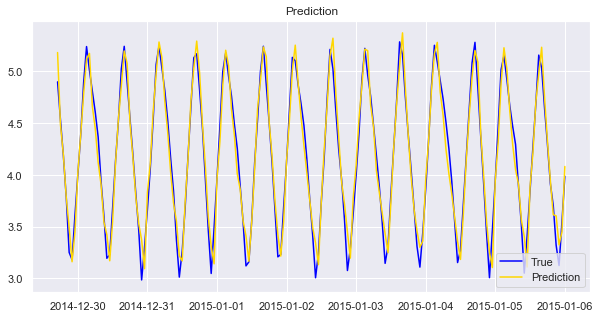

In [25]:
# grid search
sns.set()
arma.answer(series, 'L_T3', 5, 1, 0, "L_T3.grid.png")

AIC: 41216.092808	BIC: 41244.405070	HQIC: 41225.739697	Durbin_Watson: 2.003426
NormaltestResult(statistic=1891.3647181969359, pvalue=0.0)
            AC           Q      Prob(>Q)
lag                                     
1.0  -0.001731    0.026254  8.712824e-01
2.0   0.027063    6.445856  3.983825e-02
3.0   0.038039   19.130211  2.569623e-04
4.0   0.042571   35.018845  4.604127e-07
5.0   0.035832   46.276405  7.978172e-09
6.0   0.036776   58.136226  1.075329e-10
7.0   0.009506   58.928666  2.469401e-10
8.0  -0.024101   64.023214  7.526664e-11
9.0  -0.057732   93.260424  3.602097e-16
10.0 -0.024108   98.359076  1.160259e-16
11.0 -0.038424  111.312808  1.001362e-18
12.0 -0.061710  144.729687  6.628806e-25
13.0 -0.067219  184.383432  2.160909e-32
14.0 -0.064829  221.271536  2.407241e-39
15.0 -0.072199  267.028506  3.808874e-48
16.0 -0.049516  288.552826  5.955624e-52
17.0 -0.023074  293.227374  2.806974e-52
18.0  0.000539  293.229921  1.185844e-51
19.0 -0.020335  296.861289  8.793313e-52
2

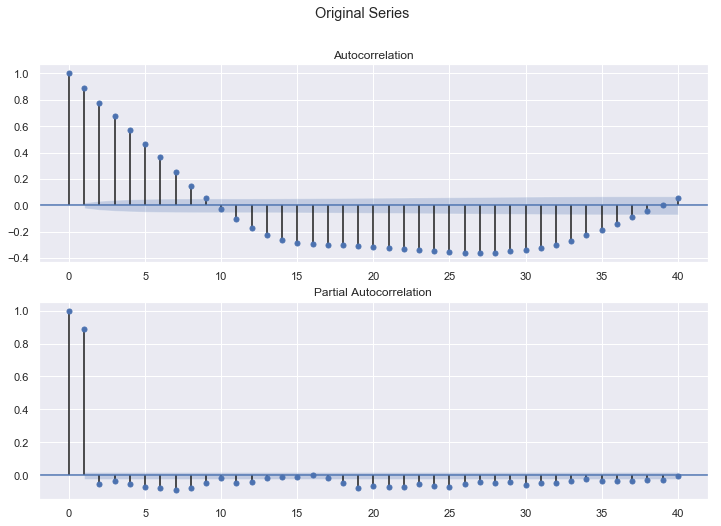

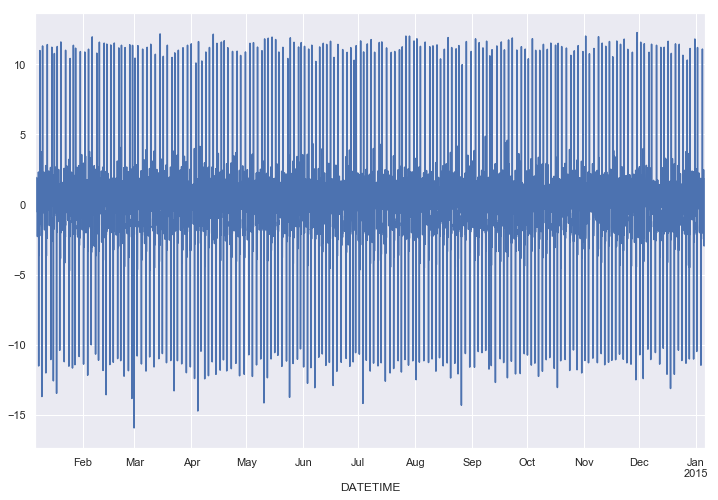

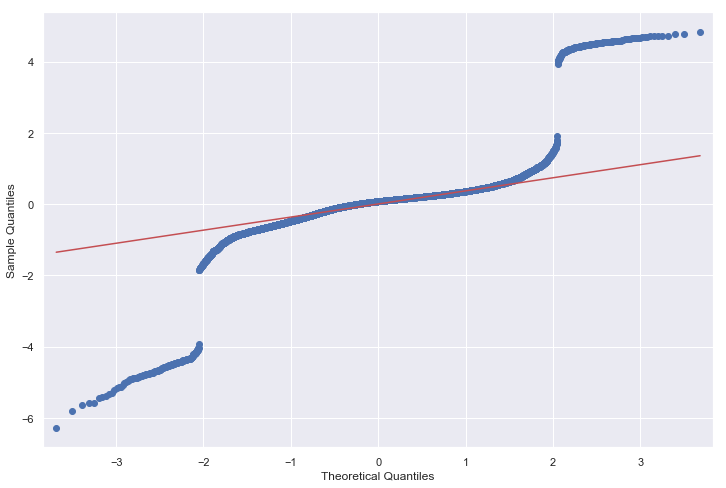

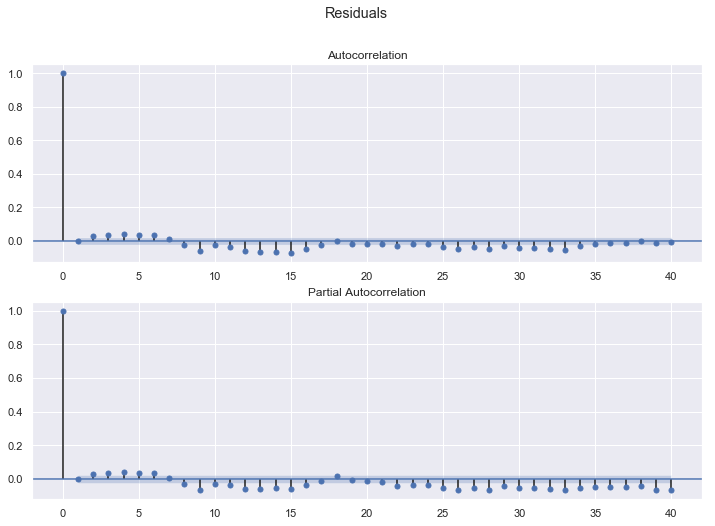

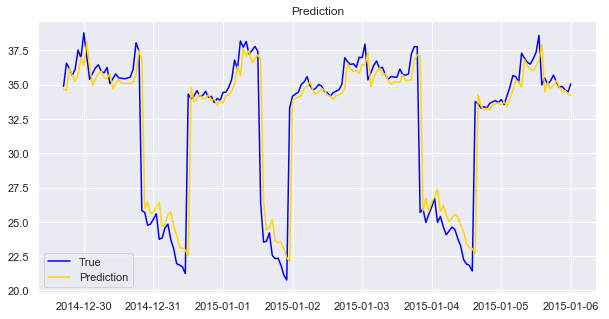

In [26]:
# manual analisys
sns.set()
arma.answer(series, 'P_J269', 2, 0, 0, "P_J269.manual.png") 

AIC: 40548.286597	BIC: 40604.911120	HQIC: 40567.580375	Durbin_Watson: 2.000590
NormaltestResult(statistic=1665.0924576236705, pvalue=0.0)
            AC           Q      Prob(>Q)
lag                                     
1.0  -0.000322    0.000910  9.759384e-01
2.0  -0.000614    0.004209  9.978976e-01
3.0   0.000350    0.005284  9.998980e-01
4.0  -0.010152    0.908926  9.232768e-01
5.0   0.003515    1.017271  9.611607e-01
6.0   0.020261    4.617082  5.937752e-01
7.0   0.005416    4.874346  6.752941e-01
8.0  -0.018673    7.932753  4.400664e-01
9.0  -0.043441   24.486596  3.594813e-03
10.0 -0.002451   24.539313  6.290605e-03
11.0 -0.009934   25.405196  7.949177e-03
12.0 -0.029022   32.796430  1.041392e-03
13.0 -0.031685   41.607230  7.590882e-05
14.0 -0.027620   48.302788  1.171170e-05
15.0 -0.031583   57.059002  8.019608e-07
16.0 -0.005206   57.296896  1.483549e-06
17.0  0.024687   62.647767  3.817465e-07
18.0  0.049375   84.054746  1.657251e-10
19.0  0.027476   90.684536  2.508283e-11
2

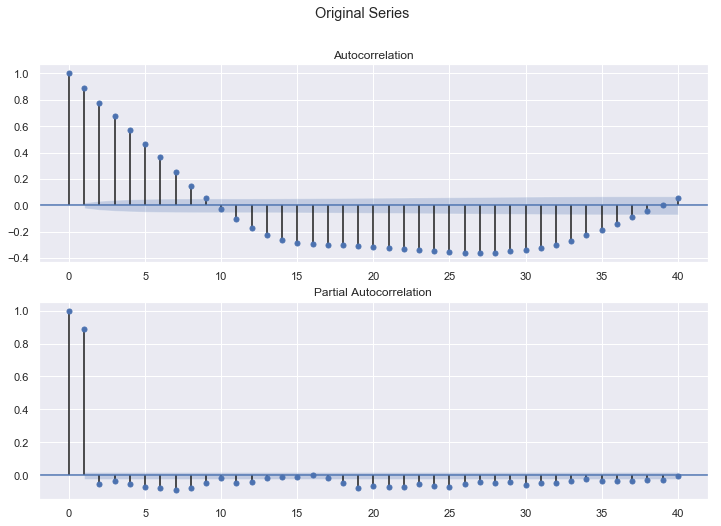

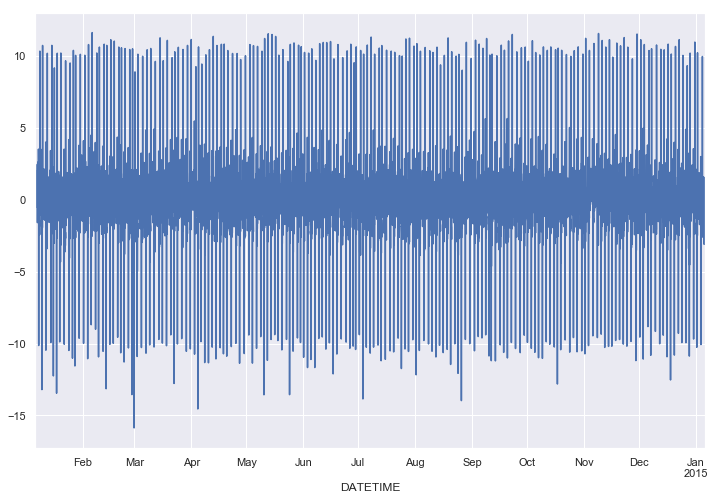

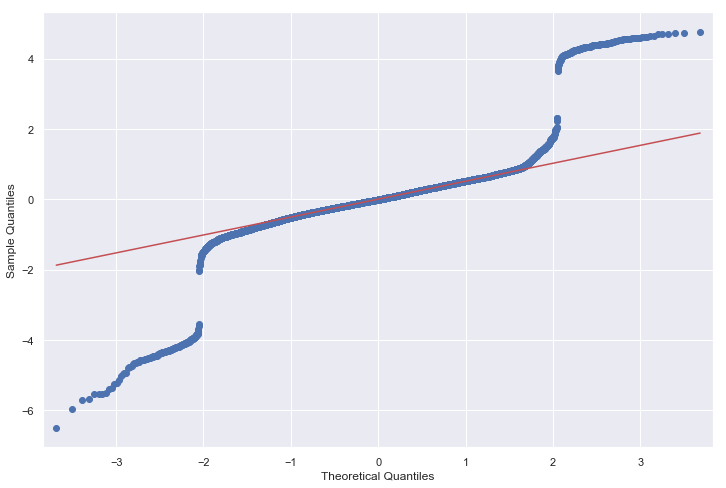

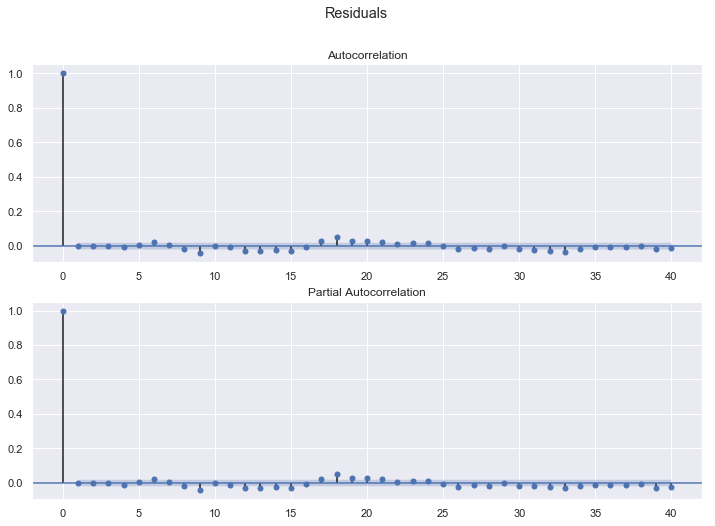

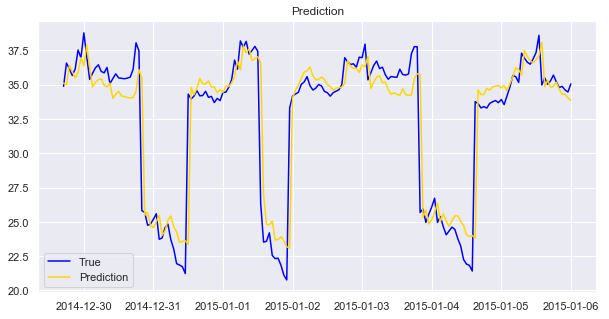

In [27]:
# grid search
sns.set()
arma.answer(series, 'P_J269', 5, 1, 0, "P_J269.grid.png")

AIC: -78038.277423	BIC: -78009.965162	HQIC: -78028.630534	Durbin_Watson: 2.005559
NormaltestResult(statistic=2778.551084576332, pvalue=0.0)
            AC           Q      Prob(>Q)
lag                                     
1.0  -0.003015    0.079658  7.777608e-01
2.0   0.058636   30.214885  2.747394e-07
3.0   0.043037   46.451494  4.546642e-10
4.0   0.033592   56.344349  1.698044e-11
5.0   0.025876   62.215001  4.232668e-12
6.0   0.020864   66.032114  2.654739e-12
7.0   0.022992   70.668327  1.082434e-12
8.0   0.016716   73.119242  1.173031e-12
9.0  -0.006806   73.525572  3.087243e-12
10.0 -0.033407   83.316331  1.120370e-13
11.0 -0.047565  103.166885  4.205666e-17
12.0 -0.078417  157.126029  2.021131e-27
13.0 -0.073087  204.005307  2.054827e-36
14.0 -0.070841  248.052164  7.265304e-45
15.0 -0.081491  306.344510  2.681486e-56
16.0 -0.073833  354.201650  1.375982e-65
17.0 -0.071896  399.586273  2.262732e-74
18.0 -0.053343  424.572369  6.787896e-79
19.0 -0.055908  452.022382  6.232317e-84

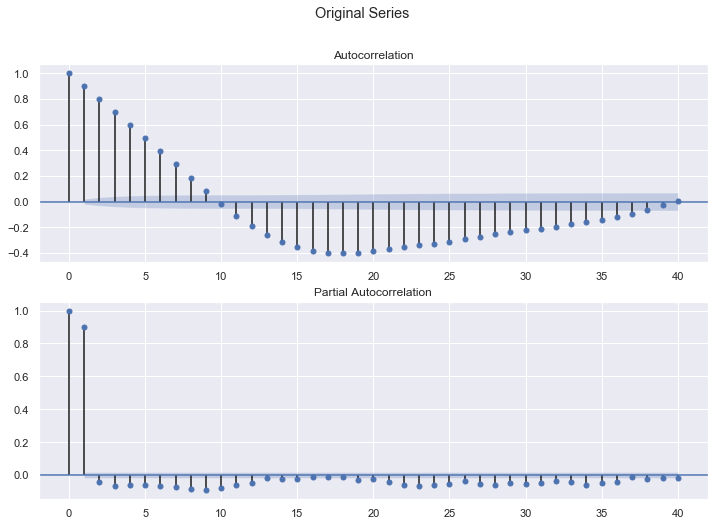

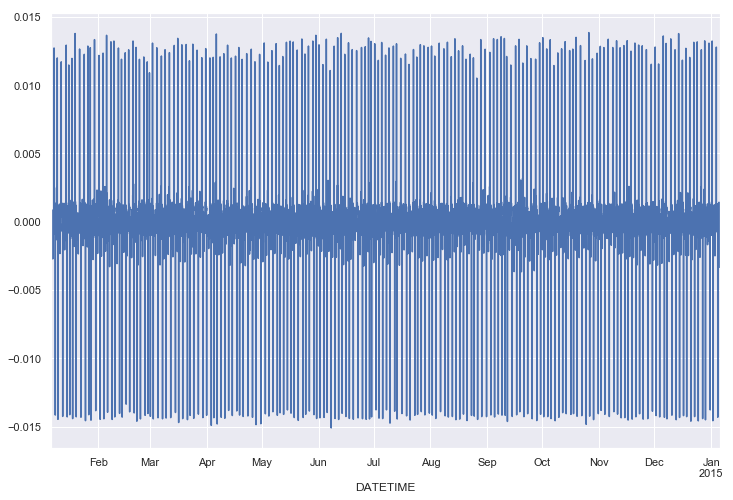

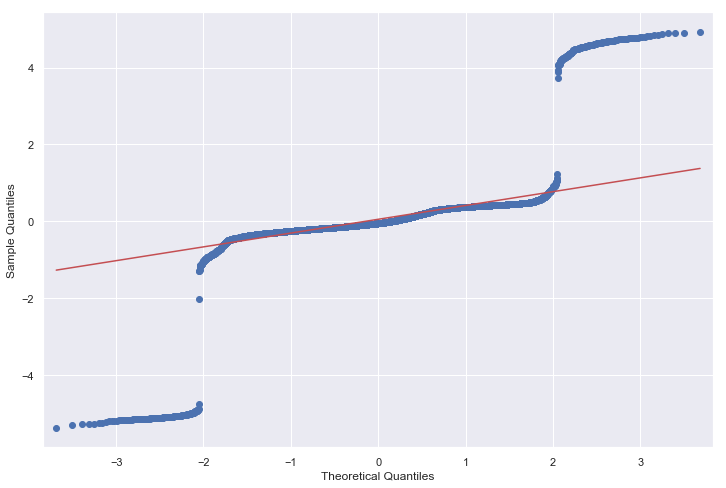

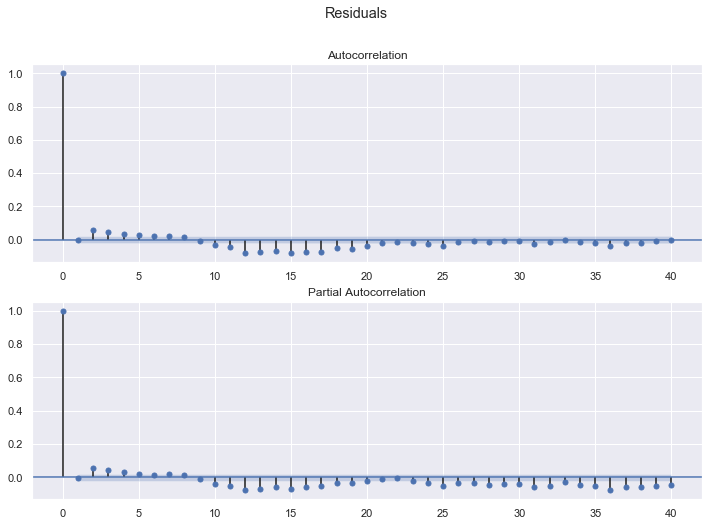

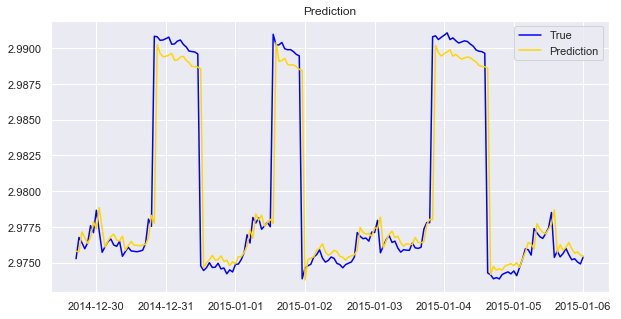

In [28]:
# manual analisys
sns.set()
arma.answer(series, 'P_J280', 2, 0, 0, "P_J280.manual.png") 

AIC: -78823.235441	BIC: -78766.610919	HQIC: -78803.941664	Durbin_Watson: 2.001085
NormaltestResult(statistic=2468.3421726099514, pvalue=0.0)
            AC           Q      Prob(>Q)
lag                                     
1.0  -0.000808    0.005723  9.396972e-01
2.0  -0.000918    0.013117  9.934629e-01
3.0  -0.002230    0.056716  9.964682e-01
4.0  -0.024491    5.315383  2.564404e-01
5.0  -0.012014    6.580903  2.537204e-01
6.0   0.001708    6.606478  3.587764e-01
7.0   0.021146   10.528036  1.605718e-01
8.0   0.029279   18.046831  2.087812e-02
9.0   0.015746   20.221733  1.659224e-02
10.0 -0.003013   20.301350  2.652786e-02
11.0 -0.011864   21.536394  2.822112e-02
12.0 -0.037522   33.890726  7.018277e-04
13.0 -0.027311   40.436517  1.175544e-04
14.0 -0.020663   44.183905  5.529093e-05
15.0 -0.028620   51.373811  7.165994e-06
16.0 -0.020099   54.920357  3.664828e-06
17.0 -0.017163   57.506728  2.694021e-06
18.0  0.000316   57.507605  5.139218e-06
19.0 -0.003068   57.590245  9.248888e-0

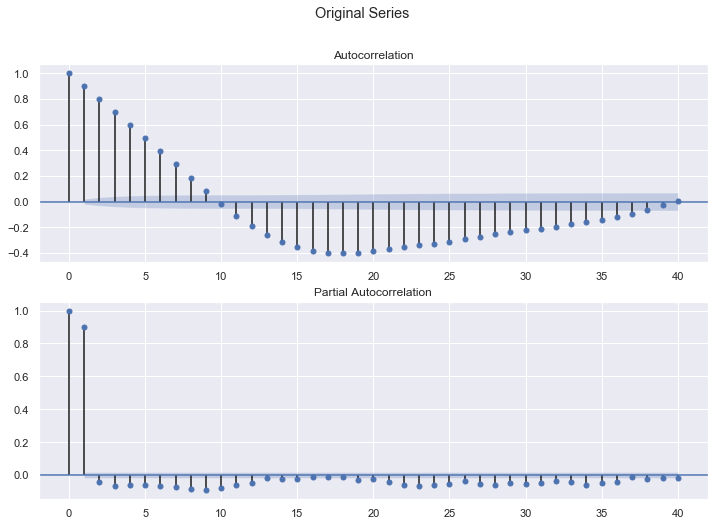

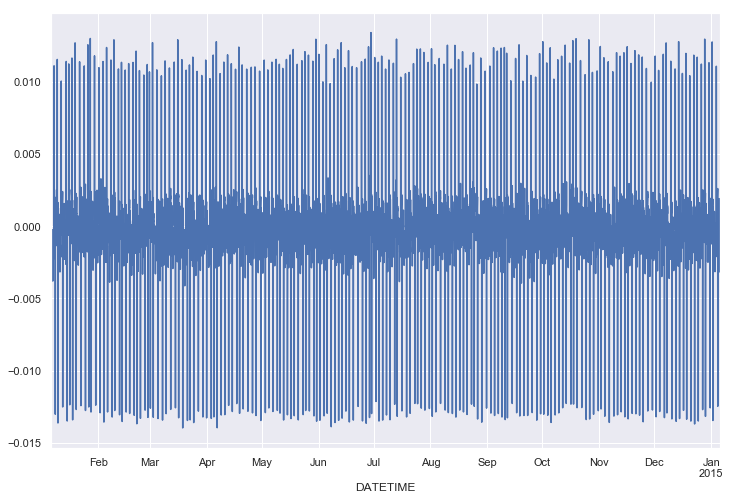

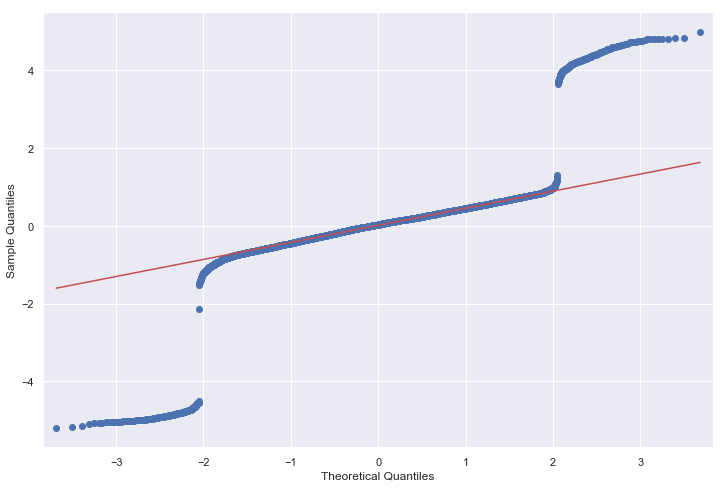

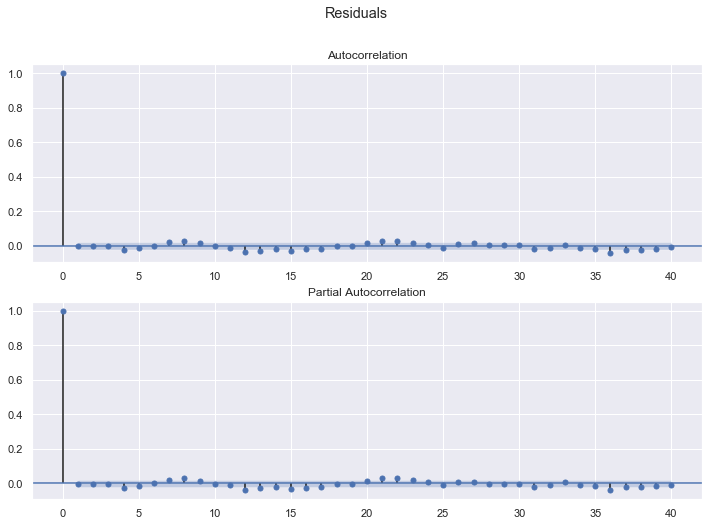

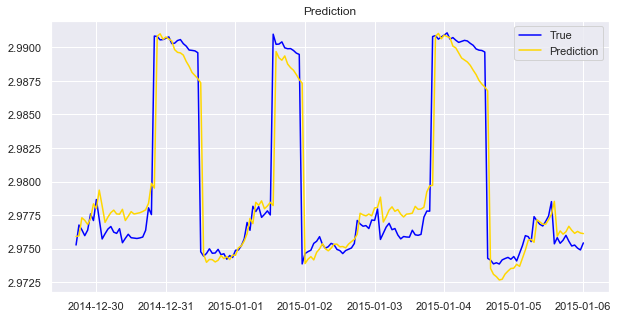

In [29]:
# grid search
sns.set()
arma.answer(series, 'P_J280', 5, 1, 0, "P_J280.grid.png")